In [ ]:
# Add lammps_logfile to available packages.
# This is a workaround since the lammps-logfile
# needs to be updated. This requirement will go away later.
import sys
sys.path.append('/drive')
%pip install pandas
%pip install ase

# This is an example program
It is only intended to show you how to import trajectory data (positions and velocities) from the file _dump.lammpstrj_

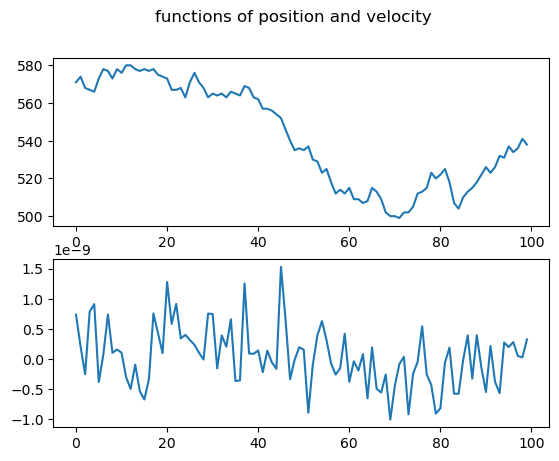

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import read
traj = read("dump.lammpstrj", format="lammps-dump-text", index=":")
n = len(traj) # Number of timesteps
nleft = np.zeros(n)
vxmean = np.zeros(n)
# Find size of simulation box
firstframe = traj[0]
cellshape = firstframe.get_cell()
halfsize = cellshape[0][0]*0.5
# Count number of particles on left side for each timestep
it = 0
for frame in traj:
    x = frame.get_positions() # positions of atoms
    xi = x[:,0] # x-coordinates of atoms
    nleft[it] = np.sum(xi<halfsize)
    v = frame.get_velocities() # velocities of atoms
    vx = v[:,0] # x-component of velocities
    vxmean[it] = np.mean(vx)
    it = it + 1
fig, axs = plt.subplots(2)
fig.suptitle('functions of position and velocity')
axs[0].plot(nleft)
axs[1].plot(vxmean)
